In [6]:
library(forecast)
rev = read.csv("Revenues.csv") #read data from Revenue.csv

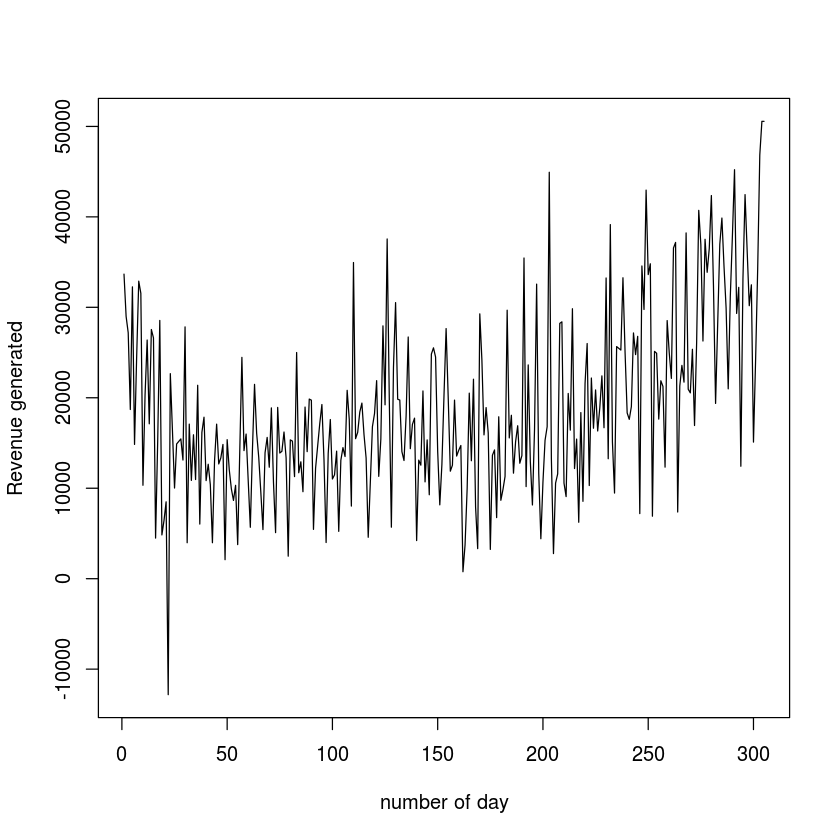

In [7]:
rev_clean = tsclean(ts(rev[,2]))
plot(rev_clean, xlab="number of day", ylab="Revenue generated")

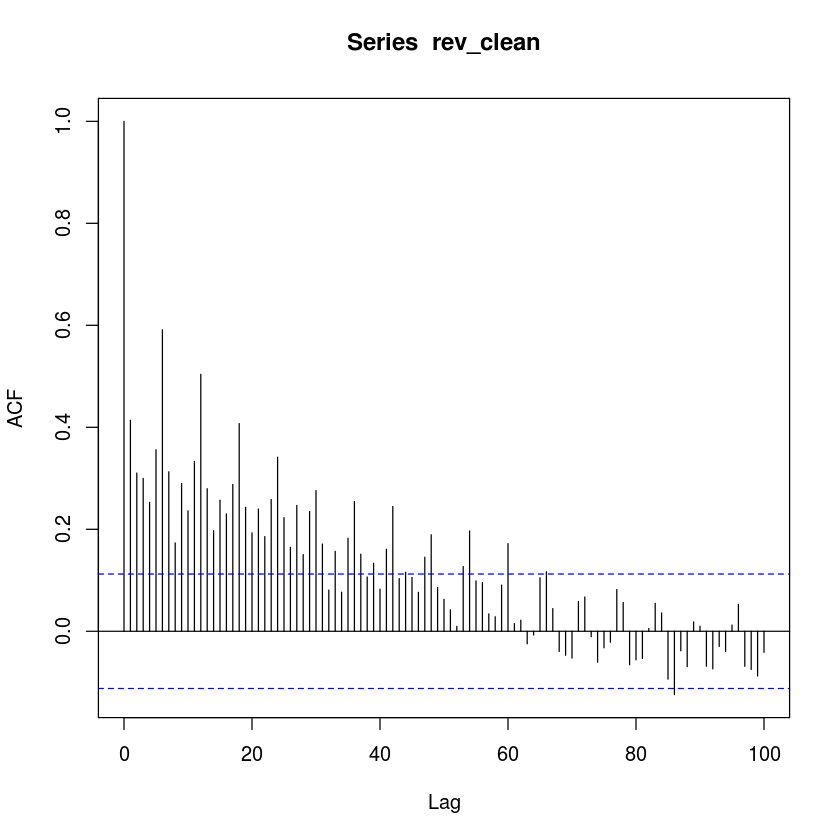

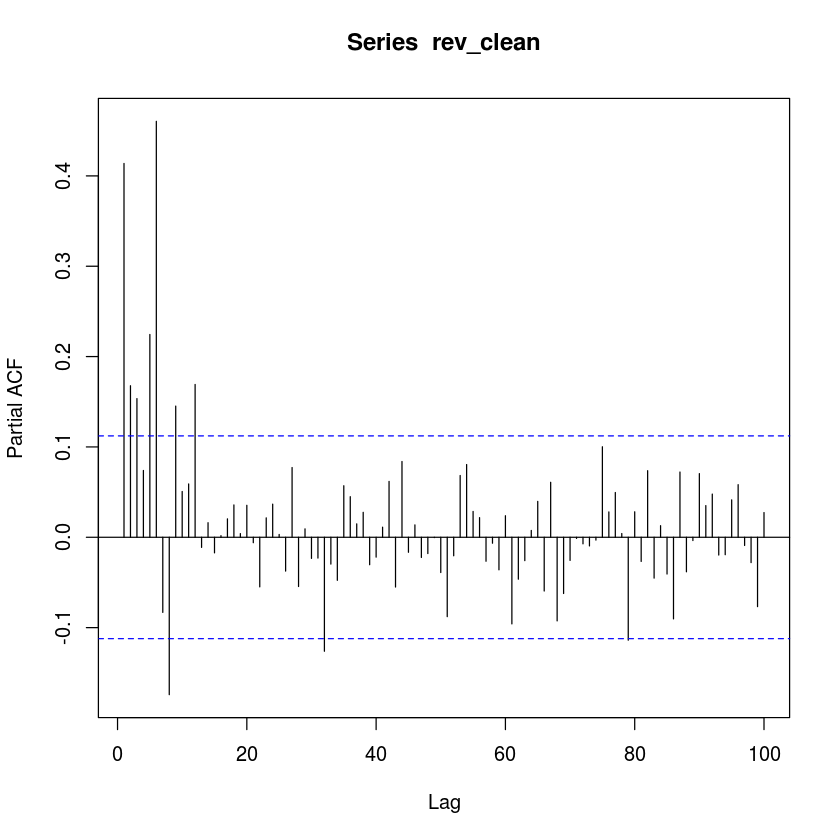

In [8]:
# plotting PACF and ACF
acf(rev_clean, 100)
pacf(rev_clean, 100)

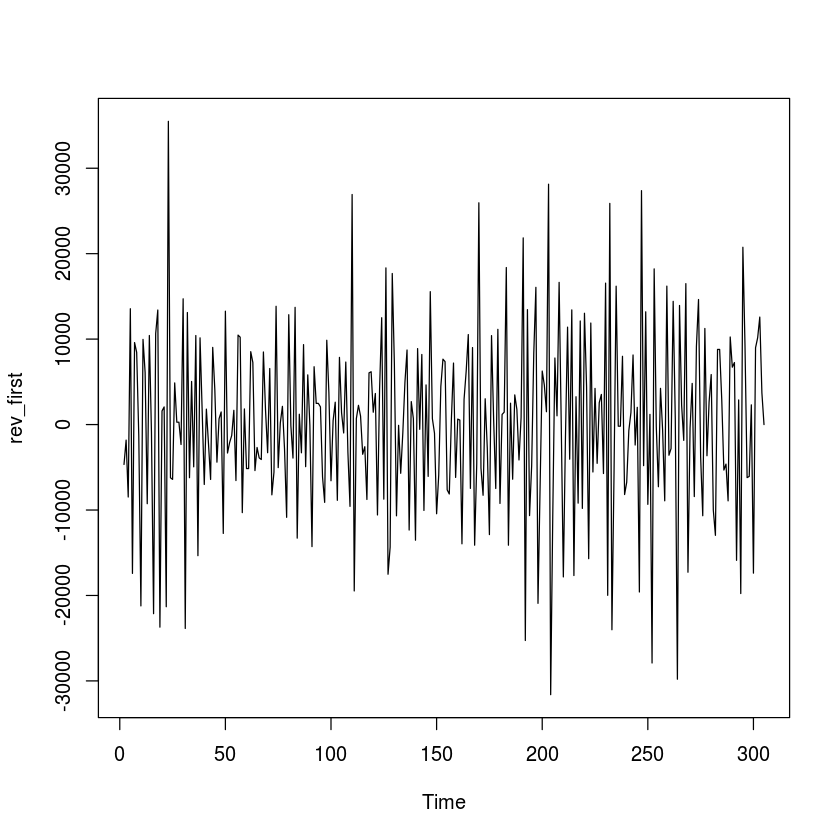

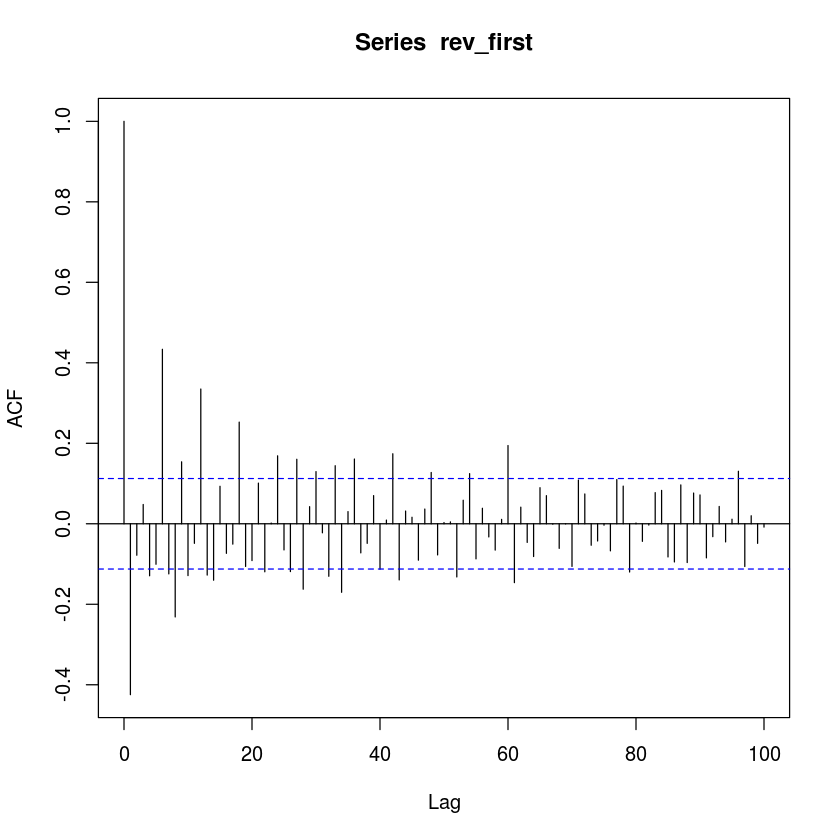

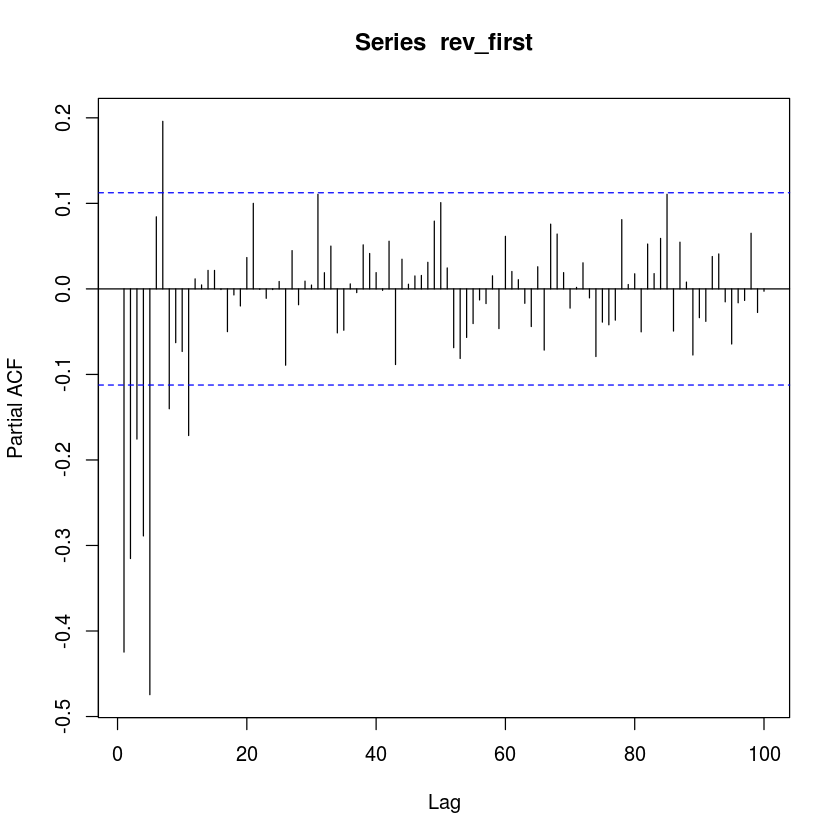

In [9]:
#first difference 
rev_first = diff(rev_clean)
plot(rev_first)
acf(rev_first,100)
pacf(rev_first,100)

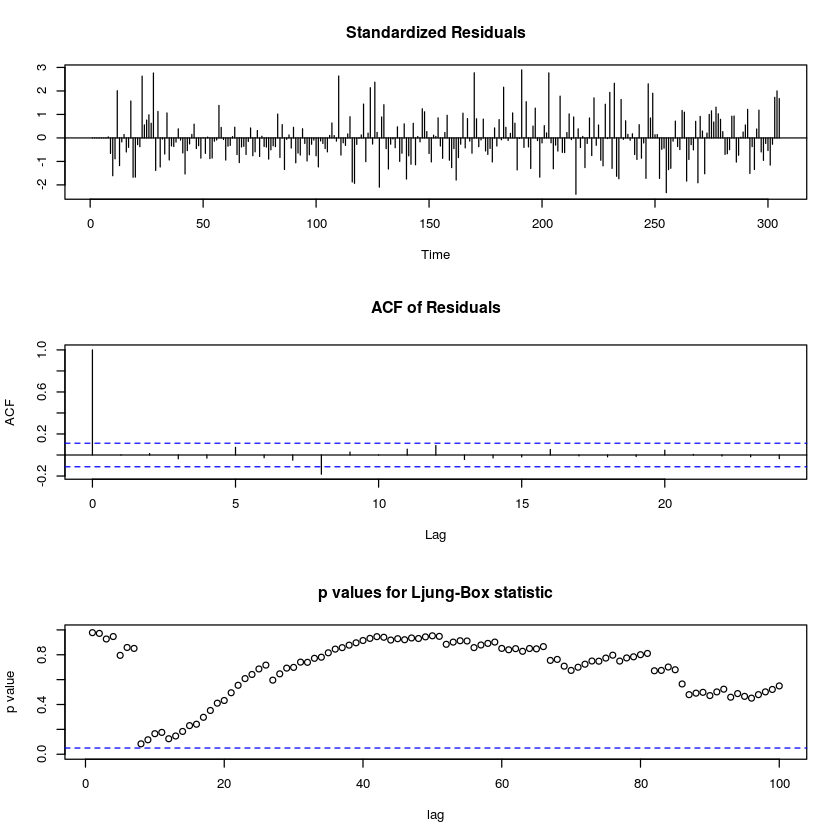

In [10]:
first_fit = arima(rev_clean, order=c(1,1,1), seasonal=list(order=c(1,0,0), period=6))
second_fit = arima(rev_clean, order=c(2,2,2), seasonal=list(order=c(1,1,1), period=6))
tsdiag(second_fit, gof.lag=100)

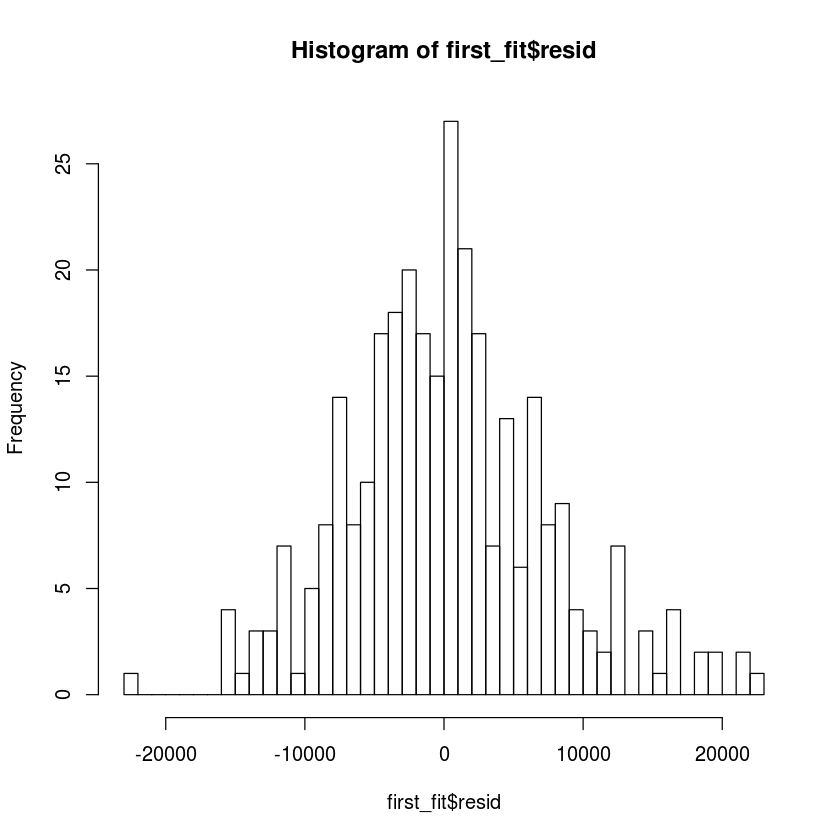


	Shapiro-Wilk normality test

data:  first_fit$resid
W = 0.98588, p-value = 0.004376


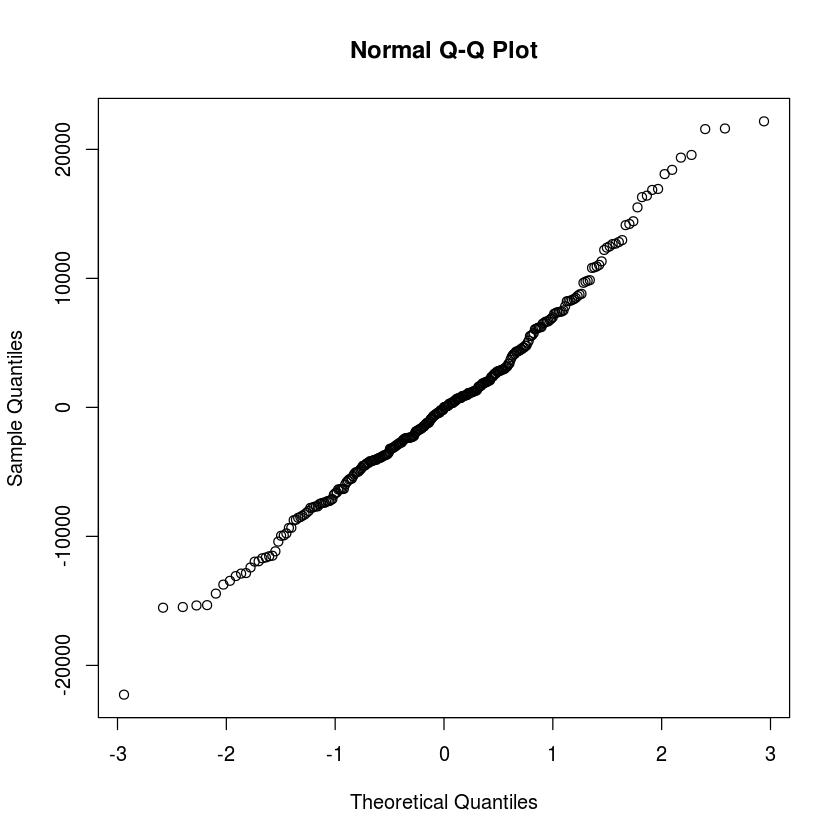

In [11]:
hist(first_fit$resid, br=50)
qqnorm(first_fit$resid)
shapiro.test(first_fit$resid)

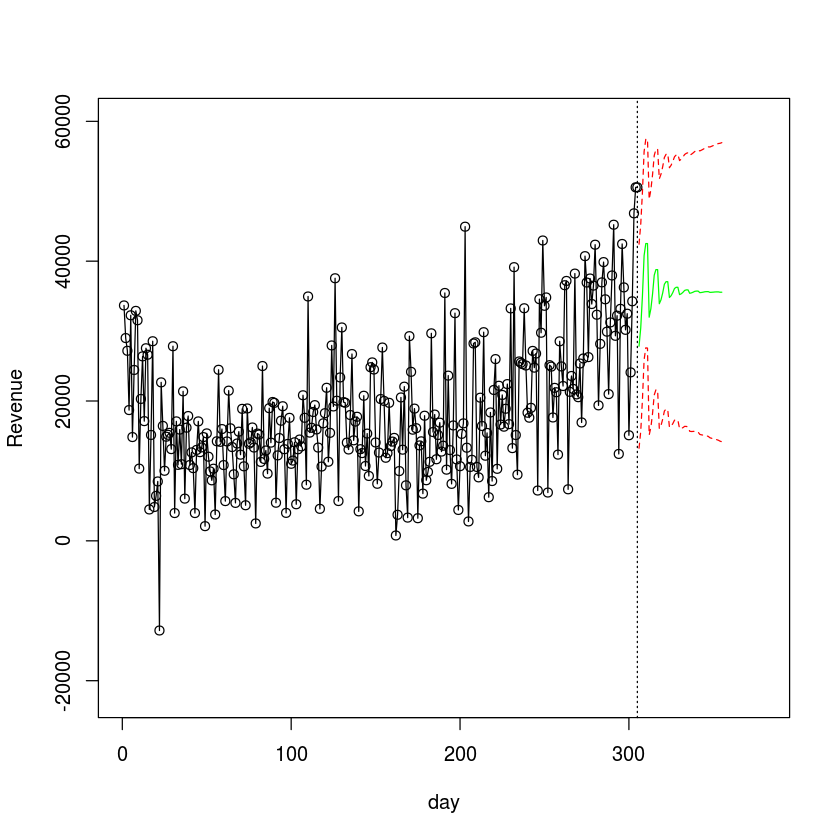

In [15]:
#days till next revenue
first_fit_predict = predict(first_fit, n.ahead=50)
up = first_fit_predict$pred + 2*first_fit_predict$se
down = first_fit_predict$pred - 2*first_fit_predict$se
day = 1:350
plot(day, rev_clean[day], type="o", xlim=c(1,380), ylim=c(-22000, 60000), ylab="Revenue")
abline(v=305,lty="dotted")
lines(first_fit_predict$pred, col="green")
lines(up, col="red", lty="dashed")
lines(down, col="red", lty="dashed")